In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('talk')
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)

In [3]:
# Import Datasets
imdb_names = pd.read_csv('data/imdb_names_update', index_col='tconst')
imdb_titles = pd.read_csv('data/imdb_titles', index_col='tconst')
tn_budgets = pd.read_csv('data/tn_movies_bud_update')
imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')

In [4]:
# Drop 'unnamed: 0' column from tn_movie_budget dataframe
tn_budgets.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
imdb_names.head()

,primary_name,nconst,primary_profession
tconst,,,
tt0837562,Mary Ellen Bauder,nm0061671,"miscellaneous,production_manager,producer"
tt0896534,Joseph Bauer,nm0061865,"composer,music_department,sound_department"
tt1470654,Bruce Baum,nm0062070,"miscellaneous,actor,writer"
tt0114371,Axel Baumann,nm0062195,"camera_department,cinematographer,art_department"
tt0452644,Pete Baxter,nm0062798,"production_designer,art_department,set_decorator"


In [6]:
imdb_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1580490 entries, tt0837562 to tt4921464
Data columns (total 3 columns):
primary_name          1580490 non-null object
nconst                1580490 non-null object
primary_profession    1580490 non-null object
dtypes: object(3)
memory usage: 48.2+ MB


In [7]:
imdb_names.nconst.duplicated().sum()

1045353

In [8]:
imdb_titles.head()

,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,NaN
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Comedy,NaN,NaN


In [9]:
imdb_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136702 entries, tt0063540 to tt9916754
Data columns (total 8 columns):
primary_title      136702 non-null object
original_title     136683 non-null object
start_year         136702 non-null int64
runtime_minutes    109815 non-null float64
genres             131664 non-null object
genres_1           131664 non-null object
genres_2           56456 non-null object
genres_3           28070 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 9.4+ MB


In [10]:
imdb_titles.loc[:,['primary_title','start_year']].duplicated().sum()

1968

Same title **and** same year! 
Naw, these must be duplicates for real. 
Let's ```loc``` and see.

In [11]:
imdb_titles.duplicated().sum()

99

Hmm, these are not clean data sets at all. 
We'll have to come back to this later.

In [12]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,remade,international_gross,online_release,release_year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,False,804600000,False,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,False,944008095,False,2015
2,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,False,696540365,False,2017
3,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,False,1116648995,False,2015
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,False,1369318718,False,2018


In [13]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### 1. Join Dataframes 

Join imdb_titles and imdb_names dataframes

In [14]:
imdb_titles_names = imdb_titles.join(imdb_names, how='inner')
imdb_titles_names.head()

,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3,primary_name,nconst,primary_profession
tconst,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,Mahasweta Devi,nm1194313,writer
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,Anjana Rawail,nm1391276,"writer,costume_designer"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN,Oja Kodar,nm0462648,"actress,writer,director"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN,Tom Callaway,nm1152466,"cinematographer,camera_department"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN,Dax Phelan,nm3902034,"writer,producer,director"


In [15]:
imdb_titles_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713875 entries, tt0063540 to tt9916754
Data columns (total 11 columns):
primary_title         713875 non-null object
original_title        713875 non-null object
start_year            713875 non-null int64
runtime_minutes       610442 non-null float64
genres                701879 non-null object
genres_1              701879 non-null object
genres_2              381528 non-null object
genres_3              216250 non-null object
primary_name          713875 non-null object
nconst                713875 non-null object
primary_profession    713875 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 65.4+ MB


### 2. Join imdb_titles_names dataframe with tn_budgets

In [16]:
tn_budgets = tn_budgets.reset_index()
imdb_titles_names = imdb_titles_names.reset_index()

In [17]:
imdb_titles_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713875 entries, 0 to 713874
Data columns (total 12 columns):
tconst                713875 non-null object
primary_title         713875 non-null object
original_title        713875 non-null object
start_year            713875 non-null int64
runtime_minutes       610442 non-null float64
genres                701879 non-null object
genres_1              701879 non-null object
genres_2              381528 non-null object
genres_3              216250 non-null object
primary_name          713875 non-null object
nconst                713875 non-null object
primary_profession    713875 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 65.4+ MB


In [18]:
imdb_titles_names.tconst.duplicated().sum()

587415

### Oh no!

There are 587,415 duplicated values in the combined data set! 
I think this is because we separated 

In [19]:
deduped_titles_names = imdb_titles_names.loc[imdb_titles_names.tconst.duplicated() == False]

In [20]:
deduped_titles_names.tconst.duplicated().sum()

0

Let's add in the ratings data too, now that we have a ```tconst``` column.

In [21]:
titles_names_ratings = pd.merge(deduped_titles_names, imdb_ratings, on='tconst')

In [22]:
titles_names_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69706 entries, 0 to 69705
Data columns (total 14 columns):
tconst                69706 non-null object
primary_title         69706 non-null object
original_title        69706 non-null object
start_year            69706 non-null int64
runtime_minutes       62857 non-null float64
genres                69062 non-null object
genres_1              69062 non-null object
genres_2              35383 non-null object
genres_3              17939 non-null object
primary_name          69706 non-null object
nconst                69706 non-null object
primary_profession    69706 non-null object
averagerating         69706 non-null float64
numvotes              69706 non-null int64
dtypes: float64(2), int64(2), object(10)
memory usage: 8.0+ MB


### The Final Merge

***
First we have to make sure the columns on which we want to merge have matching names.

In [23]:
titles_names_ratings.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'genres_1', 'genres_2', 'genres_3',
       'primary_name', 'nconst', 'primary_profession', 'averagerating',
       'numvotes'],
      dtype='object')

In [24]:
tn_budgets = tn_budgets.rename({'movie':'primary_title'}, axis=1)

In [25]:
tn_budgets.columns

Index(['index', 'id', 'release_date', 'primary_title', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'remade', 'international_gross',
       'online_release', 'release_year'],
      dtype='object')

Okay, now we can merge on ```primary_title```

In [26]:
full_merge_attempt = pd.merge(tn_budgets, titles_names_ratings, on='primary_title')

In [27]:
full_merge_attempt.columns

Index(['index', 'id', 'release_date', 'primary_title', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'remade', 'international_gross',
       'online_release', 'release_year', 'tconst', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'genres_1', 'genres_2',
       'genres_3', 'primary_name', 'nconst', 'primary_profession',
       'averagerating', 'numvotes'],
      dtype='object')

In [28]:
full_merge_attempt.loc[full_merge_attempt.tconst.duplicated() == True]

,index,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,remade,international_gross,online_release,...,runtime_minutes,genres,genres_1,genres_2,genres_3,primary_name,nconst,primary_profession,averagerating,numvotes
29,236,9,2018-11-21,Robin Hood,99000000,30824628,84747441,True,53922813,False,...,140.0,"Action,Adventure,Drama",Action,Adventure,Drama,Velibor Topic,nm0867677,"actor,miscellaneous",6.6,239480
30,236,9,2018-11-21,Robin Hood,99000000,30824628,84747441,True,53922813,False,...,92.0,"Action,Drama",Action,Drama,NaN,Katrin Goetter,nm1271854,"producer,assistant_director",6.3,78
31,236,9,2018-11-21,Robin Hood,99000000,30824628,84747441,True,53922813,False,...,116.0,"Action,Adventure,Thriller",Action,Adventure,Thriller,Chris Barwell,nm0059471,"editor,editorial_department",5.3,41588
32,236,9,2018-11-21,Robin Hood,99000000,30824628,84747441,True,53922813,False,...,NaN,NaN,NaN,NaN,NaN,Andrew Swift,nm8022954,actor,7.6,5
1105,1925,31,2012-12-31,Trance,950000,0,0,True,0,True,...,83.0,Horror,Horror,NaN,NaN,Kirk Kepper,nm0449138,"actor,producer",4.6,77
1106,1925,31,2012-12-31,Trance,950000,0,0,True,0,True,...,101.0,"Crime,Drama,Mystery",Crime,Drama,Mystery,Danny Sapani,nm0764527,actor,6.9,104951
1123,1940,52,2012-12-31,Snitch,850000,0,0,True,0,True,...,112.0,"Action,Drama,Thriller",Action,Drama,Thriller,Nadine Velazquez,nm1229204,"actress,producer,soundtrack",6.5,78142
1833,1818,100,2013-10-25,The Square,1500000,124244,176262,True,52018,False,...,108.0,"Documentary,Drama,History",Documentary,Drama,History,Mike Lerner,nm0503631,"producer,writer,director",8.1,7998
1834,1818,100,2013-10-25,The Square,1500000,124244,176262,True,52018,False,...,151.0,"Comedy,Drama",Comedy,Drama,NaN,Kalle Boman,nm0093525,"miscellaneous,producer,assistant_director",7.2,44239


In [29]:
full_merge_attempt.groupby('tconst').first().start_year.value_counts()

2014    293
2013    264
2015    262
2010    259
2011    252
2012    247
2016    232
2017    166
2018    153
Name: start_year, dtype: int64

### Question:
Why are the movies released per year of movies so not uniform?

In [30]:
full_merge_attempt.columns

Index(['index', 'id', 'release_date', 'primary_title', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'remade', 'international_gross',
       'online_release', 'release_year', 'tconst', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'genres_1', 'genres_2',
       'genres_3', 'primary_name', 'nconst', 'primary_profession',
       'averagerating', 'numvotes'],
      dtype='object')

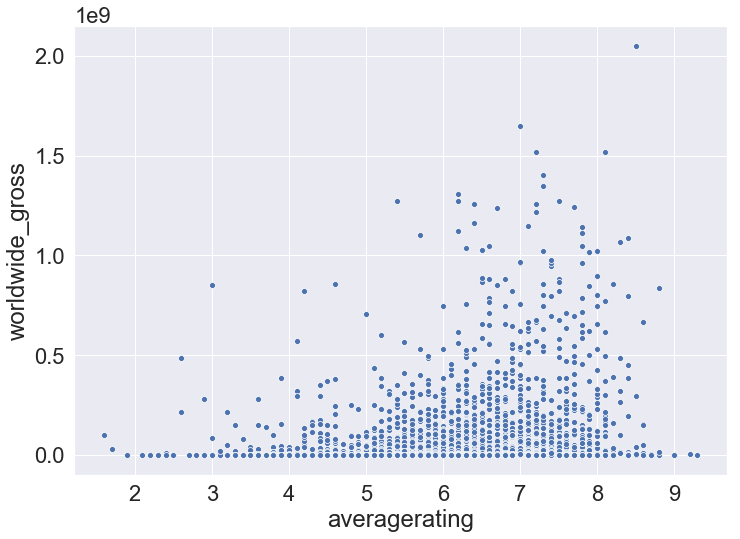

In [31]:
sns.scatterplot(x='averagerating', y='worldwide_gross', data= full_merge_attempt)

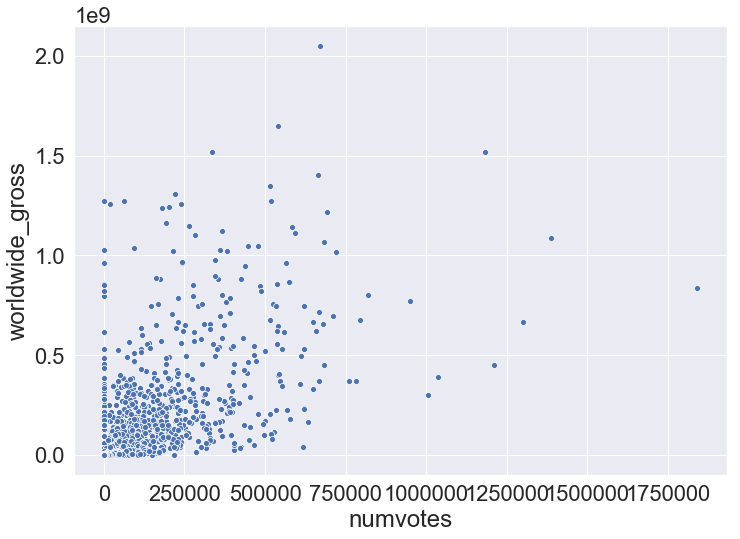

In [32]:
sns.scatterplot(x='numvotes', y='worldwide_gross', data= full_merge_attempt)

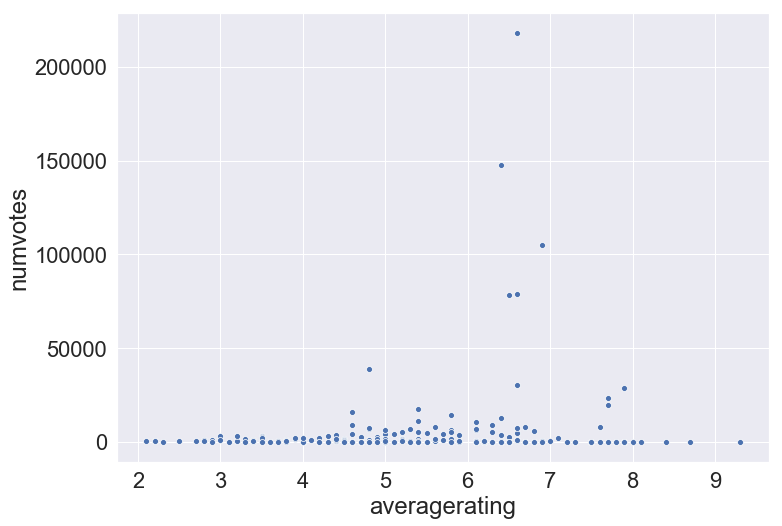

In [33]:
sns.scatterplot(x='averagerating', y='numvotes', data= full_merge_attempt.loc[full_merge_attempt.online_release==True])

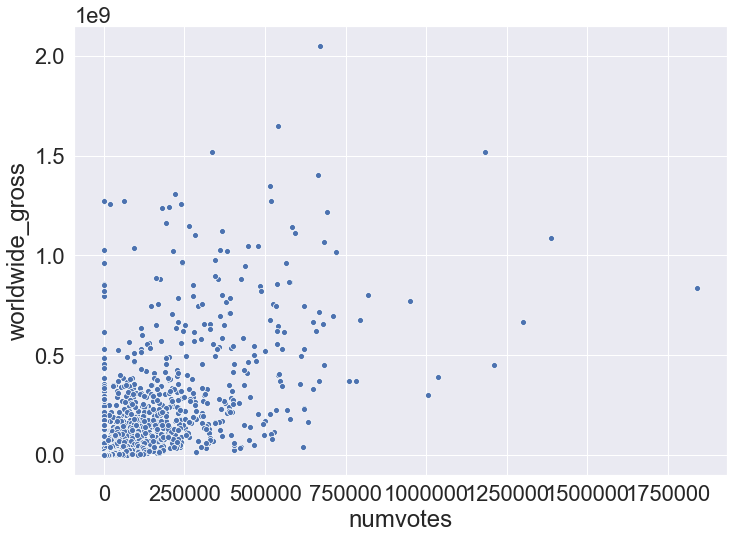

In [56]:
sns.scatterplot(x='numvotes', y='worldwide_gross', data= full_merge_attempt.loc[full_merge_attempt.online_release==False])

I think I want to compare ```averagerating```, ```numvotes```, and ```worldwide_gross```. 
I'll try binning the average rating and number votes categories and create a violin plot.

In [34]:
full_merge_attempt.numvotes.describe()

count    2.137000e+03
mean     8.500244e+04
std      1.471652e+05
min      5.000000e+00
25%      1.024000e+03
50%      2.900400e+04
75%      1.013930e+05
max      1.841066e+06
Name: numvotes, dtype: float64

In [35]:
def partition_votes_4(num_votes):
    if num_votes<=1024:
        return 1
    elif num_votes<=29004:
        return 2
    elif num_votes<=101393:
        return 3
    elif num_votes<=1841066:
        return 4
    else:
        print('I made a booboo')
        return False    

In [36]:
print(full_merge_attempt.numvotes.quantile(.20))
print(full_merge_attempt.numvotes.quantile(.40))
print(full_merge_attempt.numvotes.quantile(.60))
print(full_merge_attempt.numvotes.quantile(.80))

381.2000000000003
11084.2
49415.59999999994
126110.6000000001


In [37]:
def partition_votes_5(num_votes):
    if num_votes<=382:
        return 1
    elif num_votes<=11085:
        return 2
    elif num_votes<=49416:
        return 3
    elif num_votes<=126111:
        return 4
    elif num_votes<=1841066:
        return 5
    else:
        print('I made a booboo')
        return False    

In [38]:
full_merge_attempt['bin_numvotes'] = full_merge_attempt.numvotes.map(partition_votes_4)

In [39]:
full_merge_attempt.bin_numvotes.value_counts()

1    535
3    534
4    534
2    534
Name: bin_numvotes, dtype: int64

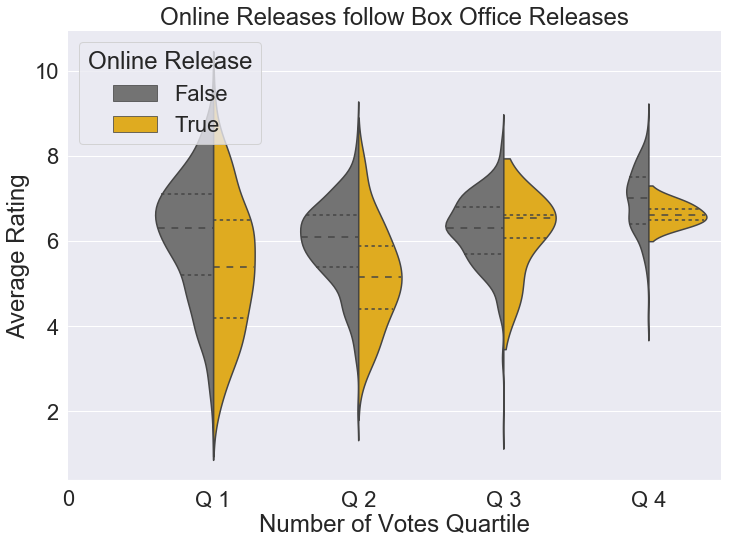

In [54]:
violin_votes_and_ratings = sns.violinplot(x='bin_numvotes', y='averagerating', hue="online_release",
               split=True, inner="quart",
               palette={True: "#FFB900", False: "#737373"},
               data=full_merge_attempt)
sns.despine(left=True)
violin_votes_and_ratings.set(xlabel='Number of Votes Quartile', ylabel='Average Rating', title='Online Releases follow Box Office Releases')
plt.xticks(ticks=[-1,0,1,2,3], labels=['0','Q 1','Q 2','Q 3','Q 4'])
plt.legend(title='Online Release', loc='upper left')

violin_votes_and_ratings.figure.savefig('violin_votes_and_ratings.png')

plt.show()

In [41]:
full_merge_attempt.production_budget.describe()

count    2.137000e+03
mean     3.692936e+07
std      5.100253e+07
min      1.400000e+03
25%      4.900000e+06
50%      1.800000e+07
75%      4.200000e+07
max      4.106000e+08
Name: production_budget, dtype: float64

In [42]:
def bin_production_budget_by_quartile(values):
    if values<=round(full_merge_attempt.production_budget.quantile(0.25)):
        return 1
    elif values<=round(full_merge_attempt.production_budget.quantile(0.50)):
        return 2
    elif values<=round(full_merge_attempt.production_budget.quantile(0.75)):
        return 3
    elif values<=round(full_merge_attempt.production_budget.quantile(1.00)):
        return 4
    else:
        print('I made a booboo in bin_production_budget_by_quartile')
        return False  

In [43]:
full_merge_attempt['bin_production_budget'] = full_merge_attempt.production_budget.map(bin_production_budget_by_quartile)

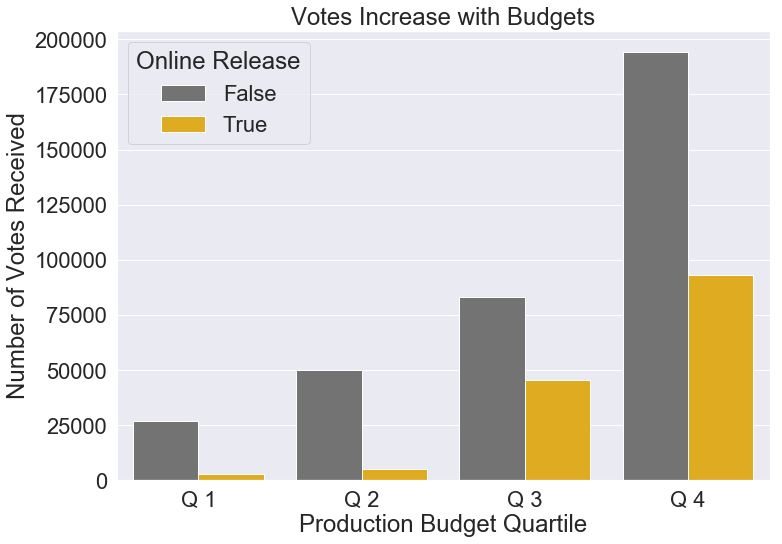

In [44]:
budgets_trend_with_votes = sns.barplot(x='bin_production_budget', y='numvotes', hue="online_release",
               palette={True: "#FFB900", False: "#737373"},
               ci=None,
               data=full_merge_attempt)

budgets_trend_with_votes.set(xlabel='Production Budget Quartile', ylabel='Number of Votes Received', title='Votes Increase with Budgets')
plt.xticks(ticks=[0,1,2,3], labels=['Q 1','Q 2','Q 3','Q 4'])
plt.legend(title='Online Release')

budgets_trend_with_votes.figure.savefig('budgets_trend_with_votes.png')

plt.show()

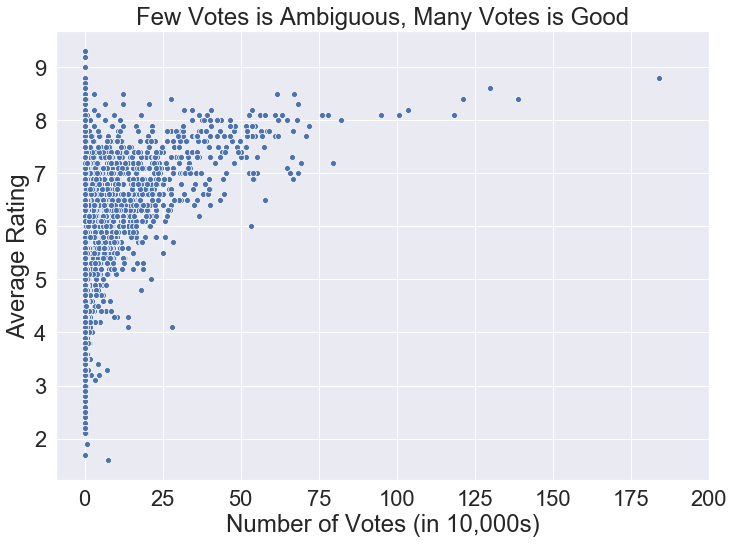

In [50]:
ratings_and_votes = sns.scatterplot(x='numvotes', y='averagerating', data=full_merge_attempt)

ratings_and_votes.set(xlabel='Number of Votes (in 10,000s)', ylabel='Average Rating', title='Few Votes is Ambiguous, Many Votes is Good')
plt.xticks(ticks=[0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000], labels=['0','25','50','75','100','125','150','175','200'])

ratings_and_votes.figure.savefig('ratings_and_votes.png')

plt.show()

In [46]:
tn_budgets['release_date']=pd.to_datetime(tn_budgets['release_date'])

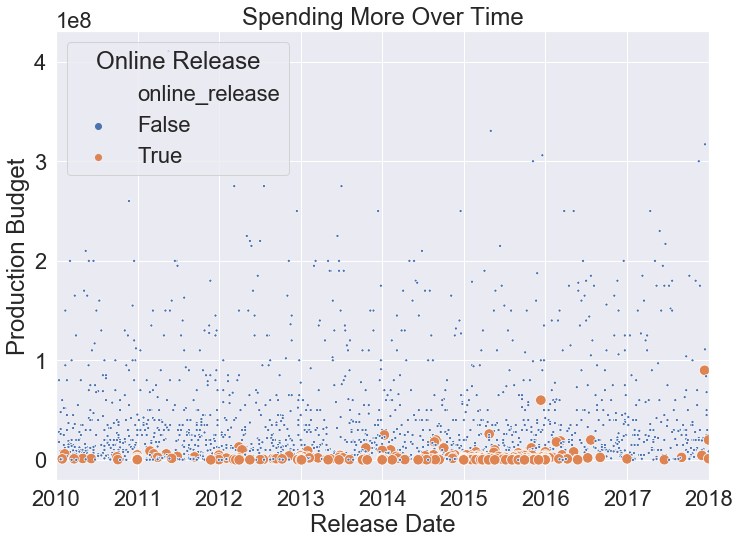

In [55]:
budgets = sns.scatterplot(x='release_date', y='production_budget', hue='online_release', data=tn_budgets,
                         s=(tn_budgets.online_release.values+1)*100-90)

budgets.set(xlim=(pd.to_datetime('2010-1-1'),pd.to_datetime('2018-1-1')), 
            xlabel='Release Date', 
            ylabel='Production Budget', 
            title='Spending More Over Time')
plt.legend(title='Online Release')

plt.show()

In [48]:
tn_budgets.loc[tn_budgets.online_release==True].production_budget.describe()

count    2.510000e+02
mean     3.470681e+06
std      8.182651e+06
min      1.400000e+03
25%      3.000000e+05
50%      1.200000e+06
75%      3.420000e+06
max      9.000000e+07
Name: production_budget, dtype: float64

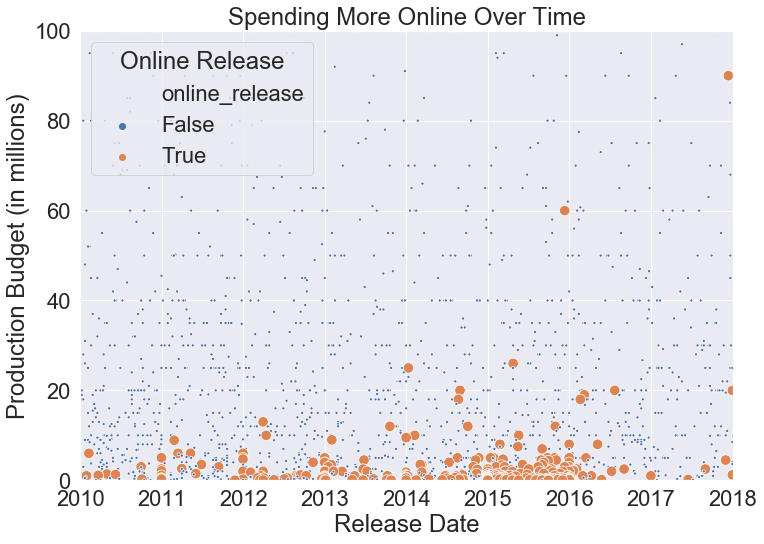

In [71]:
budgets_over_time = sns.scatterplot(x='release_date', y='production_budget', 
                                    hue='online_release', data=tn_budgets,
                         s=(tn_budgets.online_release.values+1)*100-90)

budgets_over_time.set(xlim=(pd.to_datetime('2010-1-1'),pd.to_datetime('2018-1-3')), 
            ylim=(0,100_000_000), 
            xlabel='Release Date', 
            ylabel='Production Budget (in millions)', 
            title='Spending More Online Over Time')

plt.yticks(ticks=[0,20_000_000,40_000_000,60_000_000,80_000_000,100_000_000], 
           labels=['0','20','40','60','80','100'])
plt.legend(loc='upper left',title='Online Release')

budgets_over_time.figure.savefig('budgets_over_time.png')

plt.show()